In [1]:
load('tiktok.RData')
options(warn = -1)

In [2]:
ls()

[1] "activity"           "e_space"            "e_time"            
 [4] "emotion"            "loss"               "model_construction"
 [7] "model_evaluation"   "object"             "own"               
[10] "p_space"            "p_time"             "pe_space"          
[13] "pe_time"            "search"

In [3]:
suppressWarnings(suppressMessages(library(data.table)))
suppressWarnings(suppressMessages(library(tidyr)))
suppressWarnings(suppressMessages(library(dplyr)))
suppressWarnings(suppressMessages(library(ggplot2)))
suppressWarnings(suppressMessages(library(lubridate)))
suppressWarnings(suppressMessages(library(lfe)))
suppressWarnings(suppressMessages(library(patchwork)))
suppressWarnings(suppressMessages(library(zoo)))
suppressWarnings(suppressMessages(library(stargazer)))
suppressWarnings(suppressMessages(library(xgboost)))
suppressWarnings(suppressMessages(library(caret)))

In [4]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Rocky Linux 8.7 (Green Obsidian)

Matrix products: default
BLAS:   /n/sw/helmod-rocky8/apps/Core/R/4.3.1-fasrc01/lib64/R/lib/libRblas.so 
LAPACK: /n/sw/helmod-rocky8/apps/Core/R/4.3.1-fasrc01/lib64/R/lib/libRlapack.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] caret_6.0-94       lattice_0.21-8     xgboost_1.7.6.1    stargazer_5.2.3   
 [5] zoo_1.8-12         patchwork_1.1.3    lfe_

In [5]:
training = model_construction
df = model_evaluation

#### Table 1

In [6]:
df %>% 
distinct(taobao_id, .keep_all = T) %>% 
ungroup %>% 
select(like, comment, share) %>% 
as.data.frame %>% 
stargazer(type = 'text', digits = 0, median = T)


Statistic   N    Mean  St. Dev. Min Median    Max   
----------------------------------------------------
like      2,685 38,515 111,116   0  3,654  1,831,709
comment   2,685  542    2,052    0    84    71,068  
share     2,685  936    5,007    0    80    166,821 
----------------------------------------------------


head(training)
training = data.frame(like = sample(training$like),
                     comment = sample(training$comment),
                     share = sample(training$share))
head(training)

In [7]:
stargazer(training %>% 
          select(like, comment, share) %>%
          as.data.frame, 
          summary.stat = c("n", "mean", "sd", "min", "median", "max"),
          digits = 0,
          type = "text")


Statistic   N     Mean  St. Dev. Min Median    Max   
-----------------------------------------------------
like      16,951 34,339 112,302   0  3,021  2,553,627
comment   16,951  531    2,124    0    69    71,068  
share     16,951 1,184   6,690    0    91    195,563 
-----------------------------------------------------


#### Table 2

In [8]:
df %>% 
group_by(taobao_id) %>% 
mutate(avg_sales = mean(rev)*1000,
       price = first(price),
       discount = first(discount)) %>% 
distinct(taobao_id, .keep_all = T) %>% 
ungroup %>%
select(avg_sales, price, discount) %>% 
as.data.frame %>% 
stargazer(type = 'text', digits = 0, median = T)


Statistic   N    Mean   St. Dev.  Min Median     Max    
--------------------------------------------------------
avg_sales 2,685 246,680 5,288,389  0  9,446  272,107,695
price     2,685  1,081   39,220    0    68    2,019,515 
discount  2,685   100      506     0    20     13,901   
--------------------------------------------------------


In [9]:
df %>% 
ungroup %>% 
distinct(influencer_id, .keep_all = T) %>% 
select(gender) %>% 
as.data.frame %>%
stargazer(type = 'text', digits = 2, median = T)

df %>% 
ungroup %>% 
distinct(influencer_id, .keep_all = T) %>% 
select(fans, avg_play, influencer_price, expected_cpm, order_cnt) %>% 
as.data.frame %>%
stargazer(type = 'text', digits = 0, median = T)


Statistic   N   Mean St. Dev. Min Median Max
--------------------------------------------
gender    1,404 0.58   0.49    0    1     1 
--------------------------------------------

Statistic          N     Mean    St. Dev.  Min Median     Max    
-----------------------------------------------------------------
fans             1,404 1,617,806 3,048,990  0  723,679 43,012,100
avg_play         1,404  635,432  3,255,567  0  74,908  97,890,191
influencer_price 1,404  19,530    53,808    0   6,000  1,000,000 
expected_cpm     1,404   1,027    21,315    0    121    785,714  
order_cnt        1,404    13        27      0     2       265    
-----------------------------------------------------------------


#### Table 3

In [10]:
df %>% 
ungroup %>% 
distinct(taobao_id, .keep_all = T) %>% 
select(e_score, p_score, pe_score) %>% 
as.data.frame %>% 
stargazer(type = 'text', digits = 2, median = T)


Statistic   N   Mean St. Dev. Min  Median Max 
----------------------------------------------
e_score   2,685 0.48   0.15   0.00  0.49  1.00
p_score   2,685 0.18   0.14   0.00  0.15  1.00
pe_score  2,685 0.21   0.14   0.00  0.19  1.00
----------------------------------------------


#### Figure 2

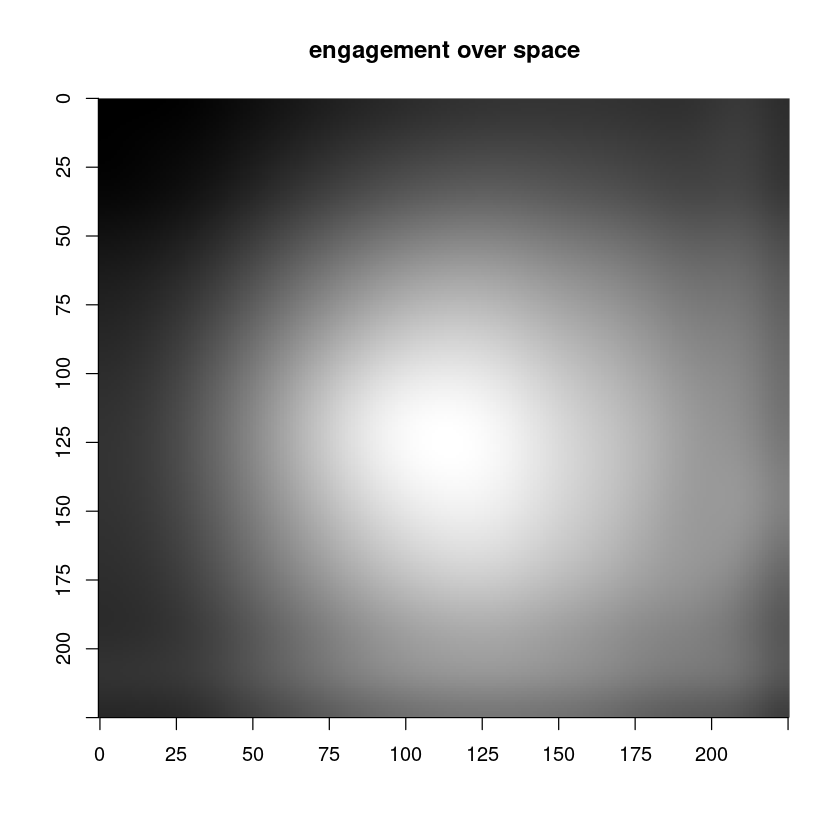

In [11]:
image(e_space,
     col=grey(seq(0, 1, length = 256)),
          ylim=c(1,0), axes = F)
title(main = "engagement over space")
axis(1, at = seq(0, 1, length.out = 10), labels = c(seq(0, 223, by = 25), ''))
axis(2, at = seq(0, 1, length.out = 10), labels = c(seq(0, 223, by = 25), ''))

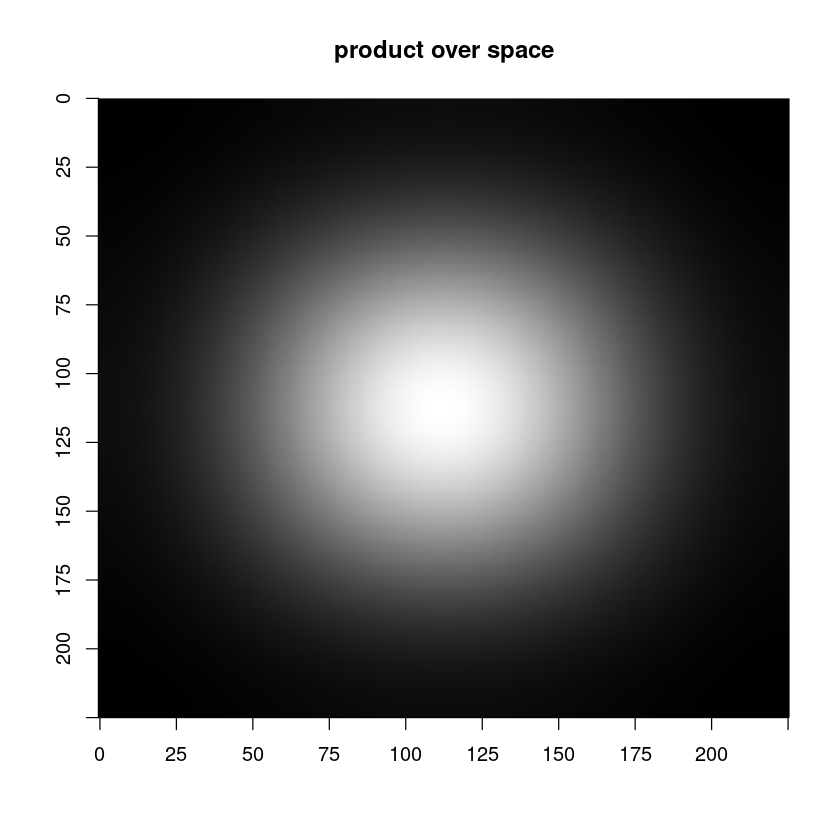

In [12]:
image(p_space,
     col=grey(seq(0, 1, length = 256)),
          ylim=c(1,0), axes = F)
title(main = "product over space")
axis(1, at = seq(0, 1, length.out = 10), labels = c(seq(0, 223, by = 25), ''))
axis(2, at = seq(0, 1, length.out = 10), labels = c(seq(0, 223, by = 25), ''))

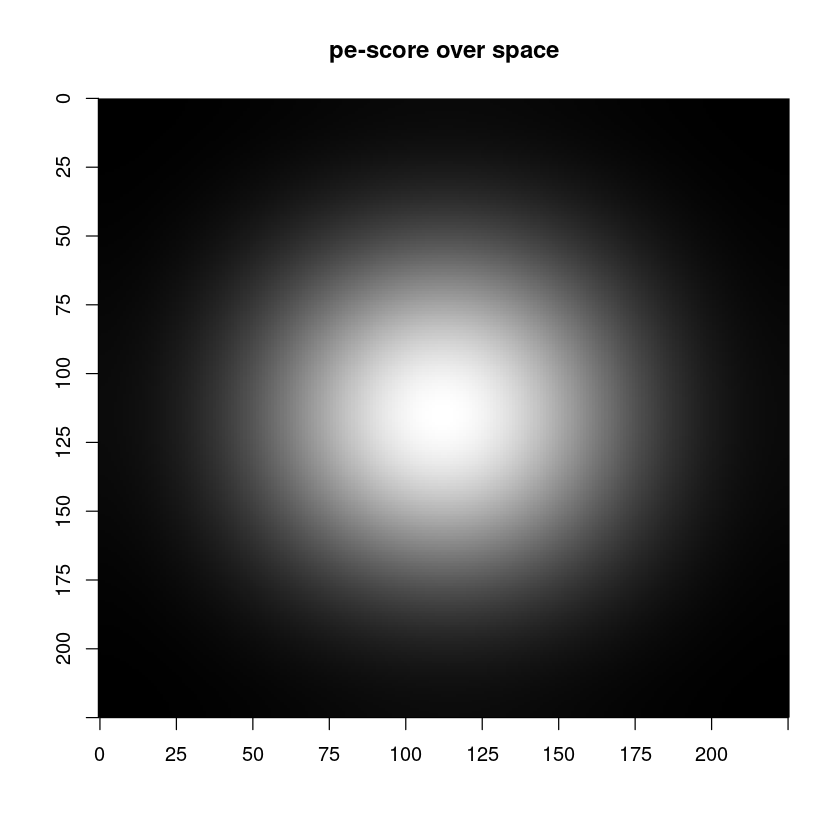

In [13]:
image(pe_space,
     col=grey(seq(0, 1, length = 256)),
          ylim=c(1,0), axes = F)
title(main = "pe-score over space")
axis(1, at = seq(0, 1, length.out = 10), labels = c(seq(0, 223, by = 25), ''))
axis(2, at = seq(0, 1, length.out = 10), labels = c(seq(0, 223, by = 25), ''))

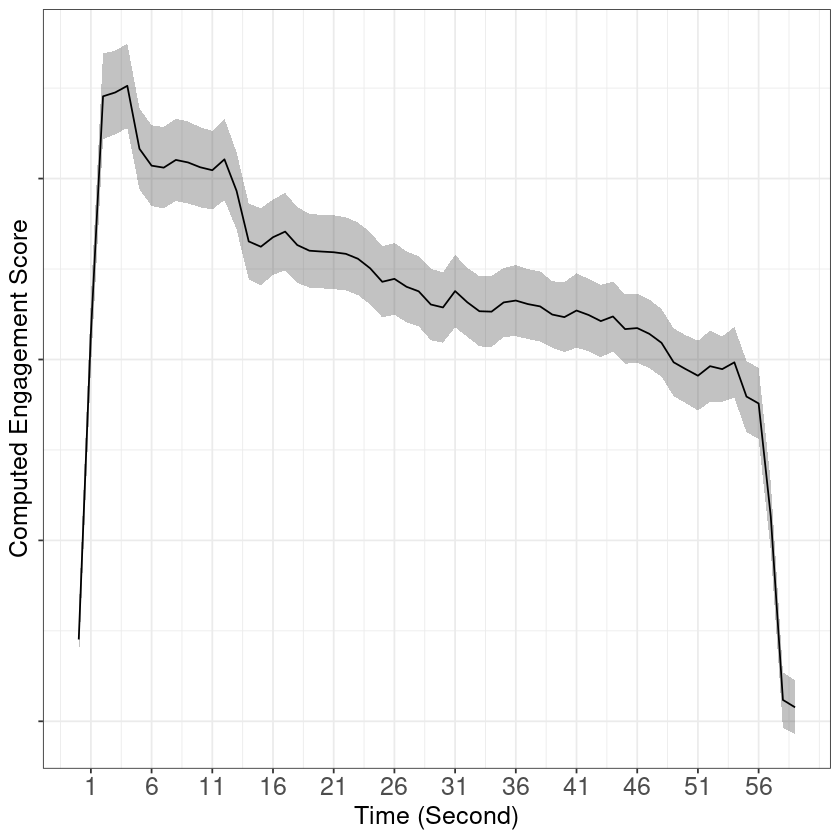

In [14]:
ggplot(aes(time, value), 
       data = e_time %>% 
       group_by(time) %>% 
       mutate(mean_value = mean(value, na.rm = T),
              sd_value = sd(value, na.rm = T))) + 
geom_ribbon(aes(ymin = mean_value - 0.1*sd_value,
               ymax = mean_value + 0.1*sd_value), alpha=0.3) +
geom_line(aes(time, mean_value)) +
theme_bw() +
scale_x_continuous(breaks=seq(1,60,5)) +
xlab('Time (Second)') +
ylab('Computed Engagement Score') +
theme(axis.text=element_text(size=15),
        axis.title=element_text(size=15)) +
theme(axis.text.y = element_blank()) 

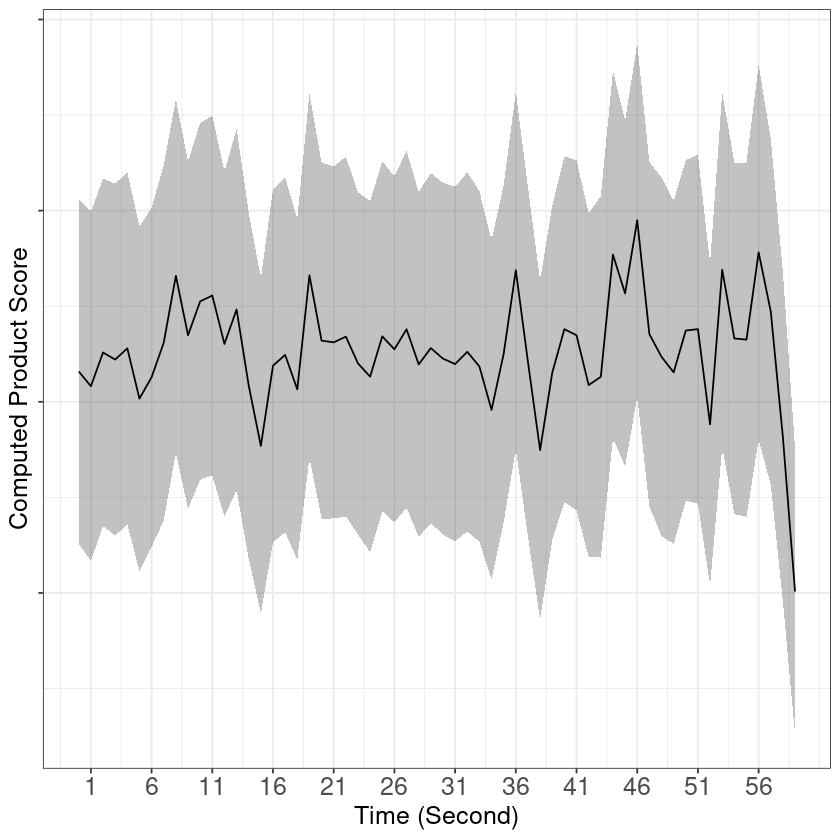

In [15]:
ggplot(aes(time, value), 
       data = p_time %>% 
       group_by(time) %>% 
       mutate(mean_value = mean(value, na.rm = T),
              sd_value = sd(value, na.rm = T))) + 
geom_ribbon(aes(ymin = mean_value - 0.1*sd_value,
               ymax = mean_value + 0.1*sd_value), alpha=0.3) +
geom_line(aes(time, mean_value)) +
theme_bw() +
scale_x_continuous(breaks=seq(1,60,5)) +
xlab('Time (Second)') +
ylab('Computed Product Score') +
theme(axis.text=element_text(size=15),
        axis.title=element_text(size=15)) +
theme(axis.text.y = element_blank())

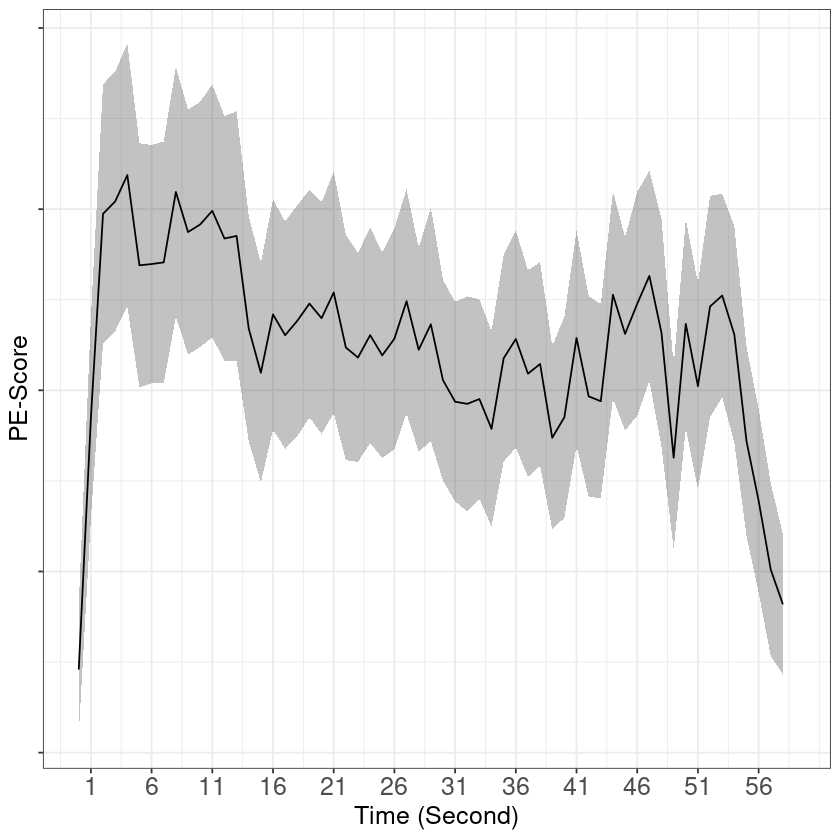

In [16]:
ggplot(aes(time, value), 
       data = pe_time %>% 
       group_by(time) %>% 
       mutate(mean_value = mean(value, na.rm = T),
              sd_value = sd(value, na.rm = T))) + 
geom_ribbon(aes(ymin = mean_value - 0.1*sd_value,
               ymax = mean_value + 0.1*sd_value), alpha=0.3) +
geom_line(aes(time, mean_value)) +
theme_bw() +
scale_x_continuous(breaks=seq(1,60,5)) +
xlab('Time (Second)') +
ylab('PE-Score') +
theme(axis.text=element_text(size=15),
        axis.title=element_text(size=15)) +
theme(axis.text.y = element_blank())

#### Figure 4

In [17]:
# create separate data frames for treated and control products

df = df %>% group_by(taobao_id) %>% 
  mutate(treated_mean = mean(treated, na.rm = T))

df %>% distinct(taobao_id, .keep_all = T) %>%
  filter(treated_mean != 1) %>%
  pull(treated_mean) %>% table %>% sum

df_treat = filter(df, treated_mean != 1)
df_control = filter(df, treated_mean == 1)

treat_id = unique(df_treat$taobao_id)

[1] 259


	Pearson's product-moment correlation

data:  s$pe_score and s$rev_diff
t = 2.6393, df = 257, p-value = 0.008815
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.04138053 0.27881772
sample estimates:
      cor 
0.1624498 


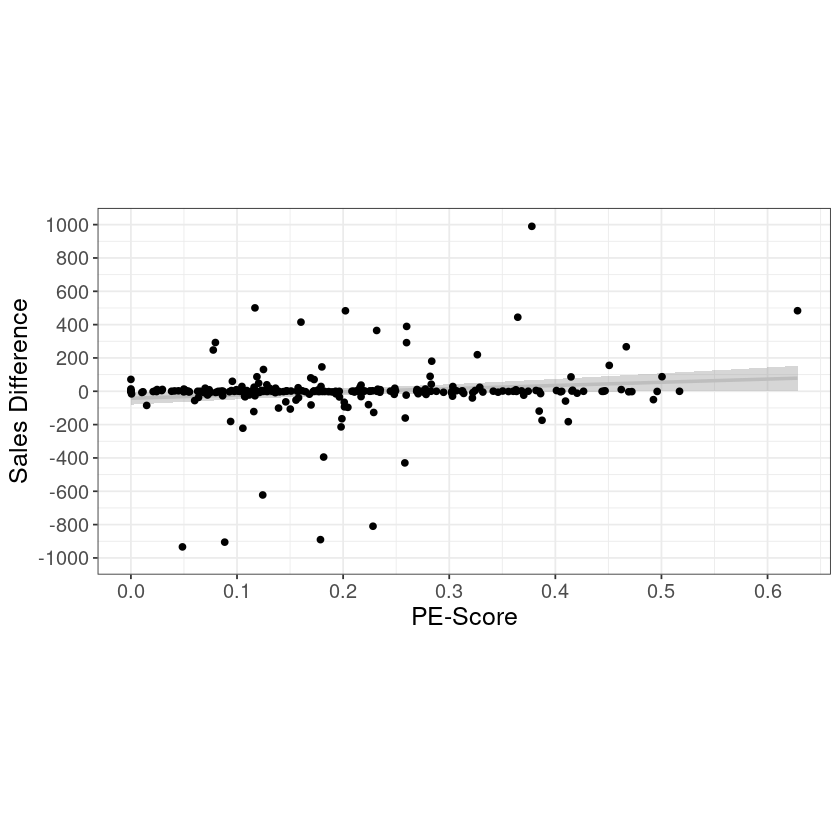

In [18]:
s = df_treat %>% # compute average revenue before and after the treatment 
  ungroup() %>%
  group_by(taobao_id, treated) %>% 
  mutate(
    avg_rev = mean(rev)
  ) %>%
  distinct(taobao_id, treated, .keep_all = T) %>%
  arrange(taobao_id) %>% 
  ungroup() %>%
  group_by(taobao_id) %>%
  mutate(count = n()) %>%
  ungroup()

s = dcast(s, taobao_id ~ treated, value.var = c("avg_rev")) # reshape the data frame so the average revenue before and after the treatment becomes two separate columns

s = left_join(s, df_treat %>% 
                distinct(taobao_id, .keep_all = T) %>%
                select(taobao_id, like, comment, share, pe_score), by = 'taobao_id') 

s$rev_diff = s[,3] - s[,2] # compute the difference in average revenue before and after the treatment 

ggplot(s,
           aes(pe_score, rev_diff)) +
  geom_smooth(method = 'lm', color = 'grey', formula = y ~ x, show.legend = T) +
  # annotate("text",x=1,y=1,label=(paste0("slope==",coef(lm(s$rev_diff~s$pe_score))[2])),parse=TRUE) + 
  geom_point() +
  xlab('PE-Score') + 
  ylab('Sales Difference') + 
  theme_bw() +
  theme(text = element_text(size=15)) +
  scale_y_continuous(
      limits = c(-1000,1000),
          breaks=seq(-1000, 1000, 200)
  ) +
  scale_x_continuous(
    breaks=seq(0, 1, 0.1)
  ) +
theme(aspect.ratio=2/4)

cor.test(s$pe_score, s$rev_diff)

#### Figure 5

In [19]:
# impute daily sales

id = unique(df$taobao_id)
rev_day = data.frame()

for (i in id) { # loop over all products 
df_p = select(df, rev, taobao_id, updated_time_rel) %>% filter(taobao_id == i) %>% arrange(updated_time_rel)
df_p$updated_time_rel = as.numeric(df_p$updated_time_rel)

s = full_seq(df_p$updated_time_rel, 1) # fill in missing dates
rev_day_p_c = data.frame(rep(i,length(s)), s)
colnames(rev_day_p_c) = c('taobao_id','updated_time_rel')

df_p = left_join(rev_day_p_c, df_p, by = c("taobao_id", "updated_time_rel"))
df_p = fill(df_p, rev) # imputing revenues on missing days by the previous value

rev_day_p = vector()

for (j in 1:nrow(df_p)) {

  rev_day_p[j] = ifelse( # imputing daily revenue
    df_p$updated_time_rel[j] == 0,
    df_p$rev[1]/30,
    ifelse(df_p$updated_time_rel[j] < 30,
                               df_p$rev[j] - df_p$rev[j-1] + df_p$rev[1]/30,
                               df_p$rev[j] - df_p$rev[j-1] + rev_day_p[j-30]
                               ))
}

df_p$rev_day = rev_day_p

rev_day = rbind(rev_day, df_p)

}

In [20]:
df$updated_time_rel = as.numeric(df$updated_time_rel)

df_day = left_join(rev_day, 
                     select(df, -rev), by = c('taobao_id','updated_time_rel')) %>% drop_na # the missing dates from the observed sale panel are dropped

In [21]:
df_day_treat = filter(df_day, taobao_id %in% treat_id)
df_day_control = filter(df_day, !(taobao_id %in% treat_id))
df_day_control$treated = 0

In [22]:
tau = vector()
gamma = vector()
r2 = vector()
r2_adj = vector()
  
for (i in seq(1,length(treat_id))) { # loop over all treated products
        
    df_day_treat_i = filter(df_day_treat, taobao_id == treat_id[[i]])
    df_day_i = rbind(df_day_treat_i, df_day_control)
    
    model = felm(rev_day ~ 
                    treated + search                 
                 |as.factor(updated_time) + as.factor(taobao_id)|0|taobao_id + updated_time,
                 df_day_i
    )
    
    tau[i] = as.numeric(coef(summary(model))[1,1])
    gamma[i] = as.numeric(coef(summary(model))[2,1])
    r2[i] = summary(model)$r2
    r2_adj[i] = summary(model)$r2adj
    
  }

In [23]:
# testing parallel trend

f_stat = vector()
  
for (i in seq(1, length(treat_id))) {
        
    df_day_treat_i = filter(df_day_treat, taobao_id == treat_id[[i]])
    df_day_i = rbind(df_day_treat_i, df_day_control)
    
    df_day_i = df_day_i %>% 
    group_by(taobao_id) %>% 
    arrange(taobao_id, updated_time) %>%
    mutate(treated_lead1 = lead(treated, n = 1),
      treated_lead2 = lead(treated, n = 2),
      treated_lead3 = lead(treated, n = 3),
      treated_lead4 = lead(treated, n = 4),
      treated_lead5 = lead(treated, n = 5),
      treated_lead6 = lead(treated, n = 6),
      treated_lead7 = lead(treated, n = 7))
    
    tryCatch({
       model = felm(rev_day ~ 
                    treated_lead1 + treated_lead2 + treated_lead3 + treated_lead4 + treated_lead5 + treated_lead6 + treated_lead7 
                 |as.factor(updated_time) + as.factor(taobao_id)|0|taobao_id + updated_time,
                 df_day_i)
    
    f_stat[i] = unname(summary(model)$P.fstat['p.F'])
        
  }, error = function(e){}
            )
  }

In [24]:
f_stat[is.na(f_stat)] = 0

In [25]:
d = data.frame(taobao_id = treat_id, tau = tau, gamma = gamma, r2 = r2, r2_adj = r2_adj, f_stat = f_stat)

d = left_join(d, 
              df %>% 
              distinct(taobao_id, .keep_all = T) %>% 
              select(taobao_id,
                            pe_score, p_score, e_score, like, comment, share,
                               price, discount, avg_search, category,
                               gender,fans,avg_play,influencer_price,expected_cpm,order_cnt, influencer_id,
                    pe_score_like, pe_score_comment, pe_score_unsup), by = 'taobao_id')

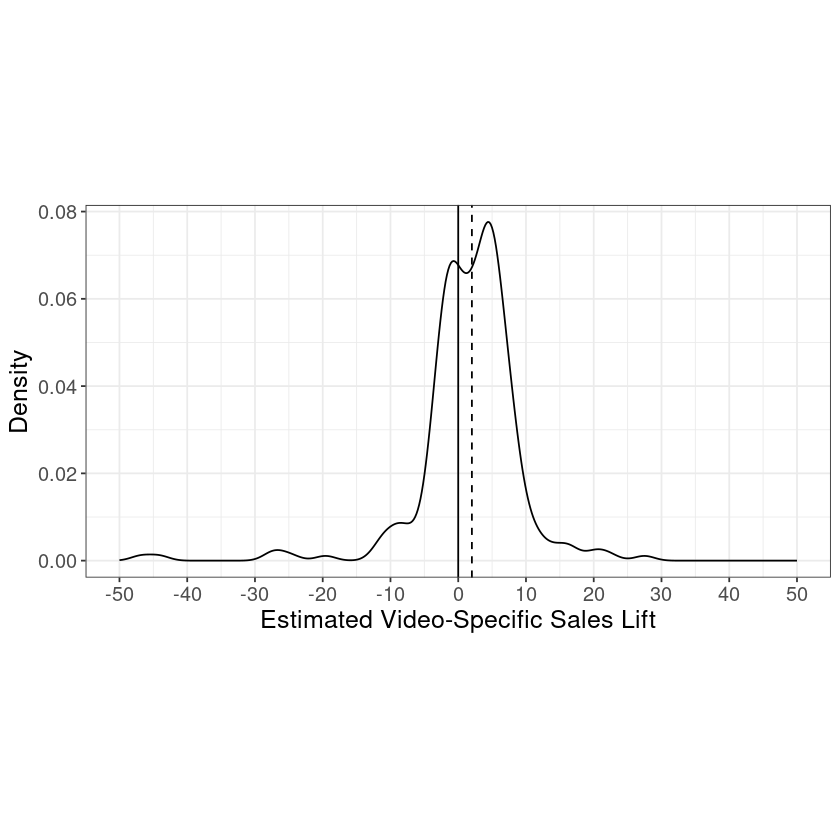

In [26]:
ggplot(d 
            %>% mutate(high = ifelse(pe_score >= median(pe_score), '1', '0')), 
            aes(x=tau)) + 
  geom_density() + geom_vline(xintercept=0) + 
  scale_x_continuous(
    limits = c(-50,50),
    breaks=seq(-50, 50, 10)
  ) +

geom_vline(aes(xintercept=mean(tau)),linetype="dashed") + 

theme_bw() +

  xlab('Estimated Video-Specific Sales Lift') + 
  ylab('Density') + 
  theme(text = element_text(size=15)) +
theme(aspect.ratio=2/4)

#### Table 4

In [27]:
d %>% 
select(tau, gamma) %>% 
as.data.frame %>% 
stargazer(type = 'text', digits = 2, median = T)


Statistic  N  Mean St. Dev.   Min   Median  Max  
-------------------------------------------------
tau       259 2.02  47.53   -123.62  2.06  699.20
gamma     259 0.41   0.01    0.39    0.40   0.49 
-------------------------------------------------


#### Table 5

In [28]:
m1 = felm(tau ~ 
               + pe_score 
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m2 = felm(tau ~ 
          + e_score
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m3 = felm(tau ~ 
               + p_score 
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m4 = felm(tau ~ 
          + p_score*e_score -p_score -e_score
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m5 = felm(tau ~ 
               + pe_score 
              + p_score*e_score
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m6 = felm(tau ~ 
               + pe_score 
             + p_score*e_score
                   
             + avg_search 
               + price
               + discount
             
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
             | category
                 , d %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

vars.order = c("pe_score", "e_score", "p_score", "p_score:e_score", 
               "gender", "fans", "avg_play", "influencer_price", "expected_cpm", "order_cnt",
               "avg_search", "price", "discount", 
               "Constant")

stargazer(m1,m2,m3,m4,m5,m6,
          digits = 2,
          type = 'text',
          star.char = c("+", "*", "**", "***"),
          star.cutoffs = c(.1, .05, .01, .001),
          omit = c("Constant"),
          order=paste0("^", vars.order , "$")
         )


                                                             Dependent variable:                                         
                    -----------------------------------------------------------------------------------------------------
                                                                     tau                                                 
                          (1)              (2)              (3)              (4)              (5)              (6)       
-------------------------------------------------------------------------------------------------------------------------
pe_score                68.27**                                                            101.32***        100.79***    
                        (22.87)                                                             (27.04)          (28.91)     
                                                                                                                         
e_score                

In [29]:
d2 = filter(d, f_stat > 0.05)

m1 = felm(tau ~ 
               + pe_score 
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m2 = felm(tau ~ 
          + e_score
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m3 = felm(tau ~ 
               + p_score 
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m4 = felm(tau ~ 
          + p_score*e_score -p_score -e_score
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m5 = felm(tau ~ 
               + pe_score 
              + p_score*e_score
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

m6 = felm(tau ~ 
               + pe_score 
             + p_score*e_score 
             + avg_search 
               + price
               + discount
               + fans
               + avg_play
               + influencer_price
               + expected_cpm
               + order_cnt 
               + gender
             | category
                 , d2 %>% mutate(
                     fans = fans/1000000,
                                avg_play = avg_play/1000000,
                               influencer_price = influencer_price/1000000,
                               expected_cpm = expected_cpm/1000000))

vars.order = c("pe_score", "e_score", "p_score", "p_score:e_score", 
               "gender", "fans", "avg_play", "influencer_price", "expected_cpm", "order_cnt",
               "avg_search", "price", "discount", 
               "Constant")

stargazer(m1,m2,m3,m4,m5,m6,
          digits = 2,
          type = 'text',
          star.char = c("+", "*", "**", "***"),
          star.cutoffs = c(.1, .05, .01, .001),
          omit = c("Constant"),
          order=paste0("^", vars.order , "$")
         )


                                                            Dependent variable:                                         
                    ----------------------------------------------------------------------------------------------------
                                                                    tau                                                 
                          (1)              (2)              (3)              (4)              (5)              (6)      
------------------------------------------------------------------------------------------------------------------------
pe_score                128.94*                                                             185.97**        184.18**    
                        (49.65)                                                             (55.72)          (64.05)    
                                                                                                                        
e_score                        

#### Table 6

In [30]:
# variable importance

set.seed(101)

x <- sparse.model.matrix(tau ~ ., data = select(d, tau,
                                                                                    pe_score,
                                                                                                            p_score, e_score,
                                                 fans, avg_play, influencer_price, expected_cpm, order_cnt,gender,

                                                    avg_search, price, discount, category,


                                                           ) %>% drop_na)[,-1]

xgb = xgboost(data = as.matrix(x), 
              label = d$tau, nround = 2, verbose = 0)

xgb.importance(model = xgb) %>% top_n(10, Gain) %>% stargazer(summary=FALSE, rownames=FALSE, type = 'text')


Feature       Gain  Cover Frequency
-----------------------------------
pe_score     0.865  0.338   0.242  
expected_cpm 0.044  0.075   0.091  
p_score      0.026  0.329   0.152  
e_score      0.025  0.006   0.091  
discount     0.017  0.034   0.212  
fans         0.013  0.070   0.091  
avg_search   0.009  0.143   0.061  
price        0.0002 0.002   0.030  
order_cnt    0.0001 0.003   0.030  
-----------------------------------


In [31]:
#r2
r2 = 1 - min(xgb$evaluation_log[['train_rmse']])^2/mean((d$tau - mean(d$tau))^2)
r2

# adjusted r2
r2_adj = 1- (1-r2)*(dim(x)[1]-1)/(dim(x)[1]-dim(x)[2]-1)
r2_adj

[1] 0.4666959

[1] 0.4194412

#### incentive misalignment 

In [32]:
model = lm(pe_score ~ own + category + fans + gender + order_cnt + price + discount, 
       data = own)

stargazer(model,
          digits = 2,
          type = 'text',
          star.cutoffs = c(.05, .01, .001)
         )


                           Dependent variable:     
                      -----------------------------
                                pe_score           
---------------------------------------------------
own                              30.92**           
                                 (9.70)            
                                                   
categoryBaby                      5.10             
                                 (14.77)           
                                                   
categoryClothing                  8.53             
                                 (14.38)           
                                                   
categoryElectronics              -15.71            
                                 (14.61)           
                                                   
categoryEntertainment             -2.85            
                                 (14.47)           
                                                   
categoryFoo